In [12]:
import urllib.request
import html5lib
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
import os
from bs4 import BeautifulSoup
# from selenium import webdriver
# from selenium.webdriver.common.keys import Keys
# from selenium.webdriver.common.by import By
import time
import sys
import numpy as np
import pandas as pd
import regex as re
import requests
import lxml
from lxml.html.soupparser import fromstring
import prettify
import numbers
import htmltext

#set some display settings for notebooks
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#add headers in case you use chromedriver (captchas are no fun); namely used for chromedriver
req_headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.8',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'
}

In [13]:
with requests.Session() as s:
    url = "https://www.brilliantearth.com/design-your-own-engagement-ring/?sid=3755106&dc="
    r = s.get(url, headers=req_headers)

#add contents of urls to soup variable from each url
soup = BeautifulSoup(r.content, 'html.parser')

In [14]:
soup


<!DOCTYPE html>

<!--<html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="https://www.facebook.com/2008/fbml">-->
<html lang="en" xmlns="http://www.w3.org/1999/xhtml">
<head>
<!-- load third part script content base on url and tag_type -->
<script src="https://www.googleoptimize.com/optimize.js?id=GTM-NVWGLJ3"></script>
<title>Design Your Own Unique Engagement Ring | Brilliant Earth</title>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="" name="author"/>
<meta content="
      Design your own engagement ring online! Browse our wide selection of beyond conflict free diamonds and designer engagement ring styles." name="description"/>
<meta content="
      engagement rings, design my own engagement ring, canadian diamonds, non conflict diamonds" name="keywords"/>
<meta content="TmCKnCEalT7vIakqjsybZcH2Mrg+aTLG6pq9W6uMo7w=" name="verify-v1"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="Brilliant Earth

In [31]:
# table = soup.find_all('table',class_="search-results-outline")
table = soup.find_all('td')

# table = bs.find(lambda tag: tag.name=='table' and tag.has_attr('div') and tag['id']=="Table1") 
rows = soup.find_all({"id":"diamonds_panel_conflict"})
rows

# df = pd.DataFrame()
# df = pd.read_html(str(table))
# print( tabulate(df, headers='keys', tablefmt='psql') )
# print(df)

[]

In [24]:
table = soup.find_all('table',class_="search-results-outline")
table_rows = table.find_all('tr')

df = pd.DataFrame()
df = table
# df = pd.read_html(str(table))[0]
l = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    l.append(row)

AttributeError: ResultSet object has no attribute 'find_all'. You're probably treating a list of items like a single item. Did you call find_all() when you meant to call find()?

In [7]:
df = pd.read_csv('diamonds.csv')

In [8]:
def rank_func(df):
    if df['Cut'] == 'Fair':
        return '1'
    elif df['Cut'] =='Good':
        return '2'
    elif df['Cut'] =='Very Good':
        return '3'
    elif df['Cut'] =='Ideal':
        return '4'
    elif df['Cut'] =='Super Ideal':
        return '5'
    else:
        return '0'

df['Cut_Rank'] = df.apply(rank_func, axis=1)
df

,Shape,Carat,Color,Clarity,Cut,Report,Origin,Price,Cut_Rank
0,Pear,1.90,G,VS1,Ideal,GIA,Russia,16310,4
1,Pear,1.90,G,VS2,Ideal,GIA,Russia,15940,4
2,Pear,1.81,D,VS2,Very Good,GIA,Botswana Sort,16240,3
3,Pear,1.81,F,VVS2,Very Good,GIA,Russia,14300,3
4,Pear,1.80,D,VS2,Very Good,GIA,Botswana Sort,16250,3
5,Pear,1.79,G,VS2,Ideal,GIA,Canada,14420,4
6,Pear,1.79,G,VS2,Super Ideal,GIA,Botswana Sort,15160,5
7,Pear,1.79,D,VS1,Ideal,GIA,Botswana Sort,16020,4
8,Pear,1.71,G,VS2,Very Good,GIA,Botswana Sort,11920,3
9,Pear,1.71,F,VS1,Super Ideal,GIA,Russia,15190,5


In [9]:
def color_func(df):
    if df['Color'] == 'J':
        return '1'
    elif df['Color'] =='I':
        return '2'
    elif df['Color'] =='H':
        return '3'
    elif df['Color'] =='G':
        return '4'
    elif df['Color'] =='F':
        return '5'
    elif df['Color'] =='E':
        return '6'
    elif df['Color'] =='D':
        return '7'
    else:
        return '0'

df['Color_Rank'] = df.apply(color_func, axis=1)
df

,Shape,Carat,Color,Clarity,Cut,Report,Origin,Price,Cut_Rank,Color_Rank
0,Pear,1.90,G,VS1,Ideal,GIA,Russia,16310,4,4
1,Pear,1.90,G,VS2,Ideal,GIA,Russia,15940,4,4
2,Pear,1.81,D,VS2,Very Good,GIA,Botswana Sort,16240,3,7
3,Pear,1.81,F,VVS2,Very Good,GIA,Russia,14300,3,5
4,Pear,1.80,D,VS2,Very Good,GIA,Botswana Sort,16250,3,7
5,Pear,1.79,G,VS2,Ideal,GIA,Canada,14420,4,4
6,Pear,1.79,G,VS2,Super Ideal,GIA,Botswana Sort,15160,5,4
7,Pear,1.79,D,VS1,Ideal,GIA,Botswana Sort,16020,4,7
8,Pear,1.71,G,VS2,Very Good,GIA,Botswana Sort,11920,3,4
9,Pear,1.71,F,VS1,Super Ideal,GIA,Russia,15190,5,5


In [10]:
def clarity_func(df):
    if df['Clarity'] == 'SI2':
        return '1'
    elif df['Clarity'] =='SI1':
        return '2'
    elif df['Clarity'] =='VS2':
        return '3'
    elif df['Clarity'] =='VS1':
        return '4'
    elif df['Clarity'] =='VVS2':
        return '5'
    elif df['Clarity'] =='VVS1':
        return '6'
    elif df['Clarity'] =='IF':
        return '7'
    elif df['Clarity'] =='FL':
        return '8'
    else:
        return '0'

df['Clarity_Rank'] = df.apply(clarity_func, axis=1)
df

,Shape,Carat,Color,Clarity,Cut,Report,Origin,Price,Cut_Rank,Color_Rank,Clarity_Rank
0,Pear,1.90,G,VS1,Ideal,GIA,Russia,16310,4,4,4
1,Pear,1.90,G,VS2,Ideal,GIA,Russia,15940,4,4,3
2,Pear,1.81,D,VS2,Very Good,GIA,Botswana Sort,16240,3,7,3
3,Pear,1.81,F,VVS2,Very Good,GIA,Russia,14300,3,5,5
4,Pear,1.80,D,VS2,Very Good,GIA,Botswana Sort,16250,3,7,3
5,Pear,1.79,G,VS2,Ideal,GIA,Canada,14420,4,4,3
6,Pear,1.79,G,VS2,Super Ideal,GIA,Botswana Sort,15160,5,4,3
7,Pear,1.79,D,VS1,Ideal,GIA,Botswana Sort,16020,4,7,4
8,Pear,1.71,G,VS2,Very Good,GIA,Botswana Sort,11920,3,4,3
9,Pear,1.71,F,VS1,Super Ideal,GIA,Russia,15190,5,5,4


In [11]:
def carat_func(df):
    if df['Carat'] >= 1.9:
        return '19'
    elif df['Carat'] >= 1.8 <= 1.89:
        return '18'
    elif df['Carat'] >= 1.7 <= 1.87:
        return '17'
    elif df['Carat'] >= 1.6 <= 1.69:
        return '16'
    elif df['Carat'] >= 1.5 <= 1.59:
        return '15'
    elif df['Carat'] >= 1.4 <= 1.49:
        return '14'
    elif df['Carat'] >= 1.3 <= 1.39:
        return '13'
    elif df['Carat'] >= 1.2 <= 1.29:
        return '12'
    elif df['Carat'] >= 1.1 <= 1.19:
        return '11'
    elif df['Carat'] >= 1.0 <= 1.09:
        return '10'
    else:
        return '0'

df['Carat_Rank'] = df.apply(carat_func, axis=1)
df

,Shape,Carat,Color,Clarity,Cut,Report,Origin,Price,Cut_Rank,Color_Rank,Clarity_Rank,Carat_Rank
0,Pear,1.90,G,VS1,Ideal,GIA,Russia,16310,4,4,4,19
1,Pear,1.90,G,VS2,Ideal,GIA,Russia,15940,4,4,3,19
2,Pear,1.81,D,VS2,Very Good,GIA,Botswana Sort,16240,3,7,3,18
3,Pear,1.81,F,VVS2,Very Good,GIA,Russia,14300,3,5,5,18
4,Pear,1.80,D,VS2,Very Good,GIA,Botswana Sort,16250,3,7,3,18
5,Pear,1.79,G,VS2,Ideal,GIA,Canada,14420,4,4,3,17
6,Pear,1.79,G,VS2,Super Ideal,GIA,Botswana Sort,15160,5,4,3,17
7,Pear,1.79,D,VS1,Ideal,GIA,Botswana Sort,16020,4,7,4,17
8,Pear,1.71,G,VS2,Very Good,GIA,Botswana Sort,11920,3,4,3,17
9,Pear,1.71,F,VS1,Super Ideal,GIA,Russia,15190,5,5,4,17


In [12]:
df['Cut_Rank'] = df.Cut_Rank.astype(float)
df['Color_Rank'] = df.Color_Rank.astype(float)
df['Clarity_Rank'] = df.Clarity_Rank.astype(float)
df['Carat_Rank'] = df.Carat_Rank.astype(float)
df['Price'] = df.Price.astype(float)
df['Carat'] = df.Carat.astype(float)

df.dtypes

Shape            object
Carat           float64
Color            object
Clarity          object
Cut              object
Report           object
Origin           object
Price           float64
Cut_Rank        float64
Color_Rank      float64
Clarity_Rank    float64
Carat_Rank      float64
dtype: object

In [13]:
df['CCCC_Rank'] = df['Cut_Rank'] + df['Color_Rank'] + df['Clarity_Rank'] + df['Carat_Rank']
df['CCCC_Rank'] = df.CCCC_Rank.astype(float)
df = df.sort_values(by='CCCC_Rank',ascending=False)
df.sort_values(by=['CCCC_Rank','Price'],ascending=False)

,Shape,Carat,Color,Clarity,Cut,Report,Origin,Price,Cut_Rank,Color_Rank,Clarity_Rank,Carat_Rank,CCCC_Rank
56,Pear,1.50,D,FL,Super Ideal,GIA,Botswana Sort,16390.0,5.0,7.0,8.0,15.0,35.0
69,Pear,1.50,D,IF,Super Ideal,GIA,Botswana Sort,15960.0,5.0,7.0,7.0,15.0,34.0
7,Pear,1.79,D,VS1,Ideal,GIA,Botswana Sort,16020.0,4.0,7.0,4.0,17.0,32.0
63,Pear,1.50,F,IF,Super Ideal,GIA,Botswana Sort,15720.0,5.0,5.0,7.0,15.0,32.0
11,Pear,1.71,D,VS1,Ideal,GIA,Russia,15450.0,4.0,7.0,4.0,17.0,32.0
21,Pear,1.65,D,VVS1,Very Good,GIA,Russia,15360.0,3.0,7.0,6.0,16.0,32.0
36,Pear,1.52,D,IF,Very Good,GIA,Russia,14500.0,3.0,7.0,7.0,15.0,32.0
74,Pear,1.50,D,VVS1,Ideal,GIA,Russia,13850.0,4.0,7.0,6.0,15.0,32.0
27,Pear,1.60,E,VVS1,Very Good,GIA,Russia,16450.0,3.0,6.0,6.0,16.0,31.0
0,Pear,1.90,G,VS1,Ideal,GIA,Russia,16310.0,4.0,4.0,4.0,19.0,31.0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



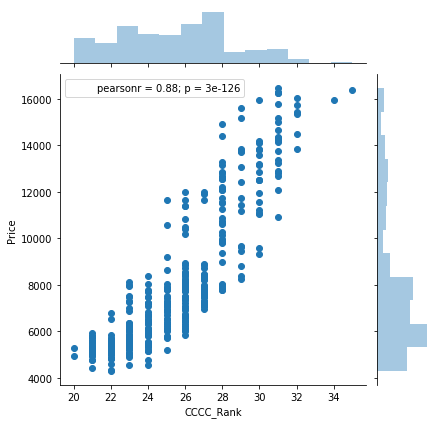

In [14]:
sns.jointplot(x="CCCC_Rank", y="Price", data=df)

In [20]:
fig = px.scatter(df, x="CCCC_Rank"
                 , y="Price"
                 , color="CCCC_Rank"
                 , size='Carat'
                 , hover_data=['Price']
                 , trendline='ols')
fig.show()

fig = px.scatter(df, x="Carat"
                 , y="Price"
                 , color="CCCC_Rank"
                 , size='Carat'
                 , hover_data=['Price']
                 , trendline='ols')
fig.show()

In [16]:
diamond = df[(df['Carat']<1.7) & (df['Price']<11000)].sort_values(by='Carat',ascending=False)

In [18]:
df.head()

,Shape,Carat,Color,Clarity,Cut,Report,Origin,Price,Cut_Rank,Color_Rank,Clarity_Rank,Carat_Rank,CCCC_Rank
56,Pear,1.50,D,FL,Super Ideal,GIA,Botswana Sort,16390.0,5.0,7.0,8.0,15.0,35.0
69,Pear,1.50,D,IF,Super Ideal,GIA,Botswana Sort,15960.0,5.0,7.0,7.0,15.0,34.0
21,Pear,1.65,D,VVS1,Very Good,GIA,Russia,15360.0,3.0,7.0,6.0,16.0,32.0
11,Pear,1.71,D,VS1,Ideal,GIA,Russia,15450.0,4.0,7.0,4.0,17.0,32.0
36,Pear,1.52,D,IF,Very Good,GIA,Russia,14500.0,3.0,7.0,7.0,15.0,32.0


In [22]:
fig = px.scatter(diamond, x="Price"
                 , y="CCCC_Rank"
                 , color="Carat"
                 , size='Carat'
                 , hover_data=['Price']
                 , trendline="ols")
fig.show()

fig = px.scatter(diamond, x="Price"
                 , y="Carat"
                 , color="CCCC_Rank"
                 , size='Carat'
                 , hover_data=['CCCC_Rank']
                 , trendline="ols")
fig.show()

fig = px.scatter(df, x="Price"
                 , y="Carat"
                 , color="CCCC_Rank"
                 , size='Carat'
                 , hover_data=['CCCC_Rank']
                 , trendline="ols")
fig.show()

In [10]:
#better diamonds list
import pandas as pd
from bs4 import BeautifulSoup as bs4
import urllib.request
import html5lib
from tabulate import tabulate
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import statsmodels.api as sm

df2 = pd.read_csv('diamonds_all.csv')

def rank_func(df2):
    if df2['Cut'] == 'Fair':
        return '1'
    elif df2['Cut'] =='Good':
        return '2'
    elif df2['Cut'] =='Very Good':
        return '3'
    elif df2['Cut'] =='Ideal':
        return '4'
    elif df2['Cut'] =='Super Ideal':
        return '5'
    else:
        return '0'

df2['Cut_Rank'] = df2.apply(rank_func, axis=1)

def color_func(df2):
    if df2['Color'] == 'J':
        return '1'
    elif df2['Color'] =='I':
        return '2'
    elif df2['Color'] =='H':
        return '3'
    elif df2['Color'] =='G':
        return '4'
    elif df2['Color'] =='F':
        return '5'
    elif df2['Color'] =='E':
        return '6'
    elif df2['Color'] =='D':
        return '7'
    else:
        return '0'

df2['Color_Rank'] = df2.apply(color_func, axis=1)

def clarity_func(df2):
    if df2['Clarity'] == 'SI2':
        return '1'
    elif df2['Clarity'] =='SI1':
        return '2'
    elif df2['Clarity'] =='VS2':
        return '3'
    elif df2['Clarity'] =='VS1':
        return '4'
    elif df2['Clarity'] =='VVS2':
        return '5'
    elif df2['Clarity'] =='VVS1':
        return '6'
    elif df2['Clarity'] =='IF':
        return '7'
    elif df2['Clarity'] =='FL':
        return '8'
    else:
        return '0'

df2['Clarity_Rank'] = df2.apply(clarity_func, axis=1)

def carat_func(df2):
    if df2['Carat'] >= 1.9:
        return '19'
    elif df2['Carat'] >= 1.8 <= 1.89:
        return '18'
    elif df2['Carat'] >= 1.7 <= 1.87:
        return '17'
    elif df2['Carat'] >= 1.6 <= 1.69:
        return '16'
    elif df2['Carat'] >= 1.5 <= 1.59:
        return '15'
    elif df2['Carat'] >= 1.4 <= 1.49:
        return '14'
    elif df2['Carat'] >= 1.3 <= 1.39:
        return '13'
    elif df2['Carat'] >= 1.2 <= 1.29:
        return '12'
    elif df2['Carat'] >= 1.1 <= 1.19:
        return '11'
    elif df2['Carat'] >= 1.0 <= 1.09:
        return '10'
    else:
        return '0'

df2['Carat_Rank'] = df2.apply(carat_func, axis=1)

df2['Cut_Rank'] = df2.Cut_Rank.astype(float)
df2['Color_Rank'] = df2.Color_Rank.astype(float)
df2['Clarity_Rank'] = df2.Clarity_Rank.astype(float)
df2['Carat_Rank'] = df2.Carat_Rank.astype(float)
df2['Price'] = df2.Price.astype(float)
df2['Carat'] = df2.Carat.astype(float)

df2['CCCC_Rank'] = df2['Cut_Rank'] + df2['Color_Rank'] + df2['Clarity_Rank'] + df2['Carat_Rank']
df2['CCCC_Rank'] = df2.CCCC_Rank.astype(float)
df2 = df2.sort_values(by='CCCC_Rank',ascending=False)
df2.sort_values(by=['CCCC_Rank'],ascending=False)

df2 = df2[(df2['Color_Rank']>=4.0) & (df2['Price']<25000)].sort_values(by='Carat',ascending=False)

fig = px.scatter(df2, x="Price"
                 , y="CCCC_Rank"
                 , color="Carat"
                 , size='Carat'
                 , hover_data=['Price']
                 , trendline="ols")
fig.show()

fig = px.scatter(df2, x="Price"
                 , y="Carat"
                 , color="CCCC_Rank"
                 , size='Carat'
                 , hover_data=['CCCC_Rank']
                 , trendline="ols")
fig.show()

print(df2.dtypes)
df2

Shape            object
Carat           float64
Color            object
Clarity          object
Cut              object
Report           object
Origin           object
Price           float64
Cut_Rank        float64
Color_Rank      float64
Clarity_Rank    float64
Carat_Rank      float64
CCCC_Rank       float64
dtype: object


,Shape,Carat,Color,Clarity,Cut,Report,Origin,Price,Cut_Rank,Color_Rank,Clarity_Rank,Carat_Rank,CCCC_Rank
43,Pear,2.16,E,VS2,Very Good,GIA,Russia,21110.0,3.0,6.0,3.0,19.0,31.0
44,Pear,2.15,D,VS2,Super Ideal,GIA,Russia,24010.0,5.0,7.0,3.0,19.0,34.0
45,Pear,2.13,G,VS1,Very Good,GIA,Russia,20310.0,3.0,4.0,4.0,19.0,30.0
46,Pear,2.11,G,VVS2,Very Good,GIA,Russia,20860.0,3.0,4.0,5.0,19.0,31.0
47,Pear,2.08,E,VVS1,Very Good,GIA,Russia,23020.0,3.0,6.0,6.0,19.0,34.0
48,Pear,2.02,E,VVS1,Very Good,GIA,Russia,23610.0,3.0,6.0,6.0,19.0,34.0
49,Pear,2.02,E,VS1,Very Good,GIA,Russia,24360.0,3.0,6.0,4.0,19.0,32.0
58,Pear,2.01,D,VS1,Very Good,GIA,Russia,21980.0,3.0,7.0,4.0,19.0,33.0
60,Pear,2.01,F,VS2,Very Good,GIA,Canada,18590.0,3.0,5.0,3.0,19.0,30.0
53,Pear,2.01,D,VVS2,Very Good,GIA,Russia,23820.0,3.0,7.0,5.0,19.0,34.0
